Questions:

1.) Who was being polled and what was their party affiliation?
2.) Did the poll results favor Trump?
3.) How do undecided voters effect the poll?
4.) Can we account for the undecided voters?
5.) How did voter sentiment change over time?
6.) Can we see an effect in the polls from the debates?



In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import requests
from io import StringIO

In [4]:
#url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"
# Use requests to get the information in text form
#source = requests.get(url).text
# Use StringIO to avoid an IO error with pandas
#poll_data = StringIO(source) 

In [5]:
#poll_df = pd.read_csv(poll_data)

poll_df = pd.read_csv(url)

poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 202.2+ KB


In [6]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


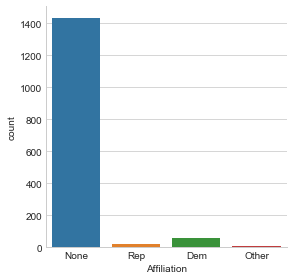

In [7]:
sns.factorplot('Affiliation', data = poll_df, kind = 'count')

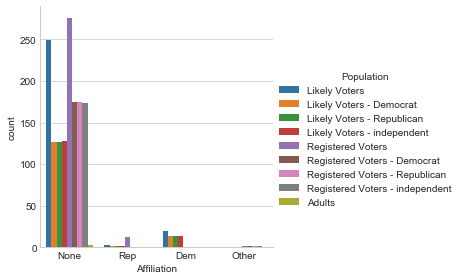

In [8]:
sns.factorplot('Affiliation', data = poll_df, hue = 'Population', kind = 'count')

In [9]:
avg = pd.DataFrame(poll_df.mean())

avg.drop('Number of Observations', axis = 0, inplace = True)

avg.drop('Question Iteration', axis = 0, inplace = True)

In [10]:
avg.head()

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068


In [11]:
std = pd.DataFrame(poll_df.std())

std.drop('Number of Observations', axis = 0, inplace = True)

std.drop('Question Iteration', axis = 0, inplace = True)

In [12]:
std.head()

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118


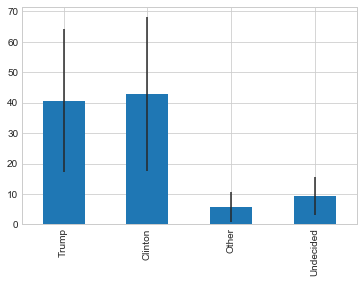

In [13]:
avg.plot(yerr = std, kind = 'bar', legend = False)

In [14]:
poll_avg = pd.concat([avg, std], axis = 1)

In [15]:
poll_avg.columns = ['Average', 'STD']

poll_avg

,Average,STD
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


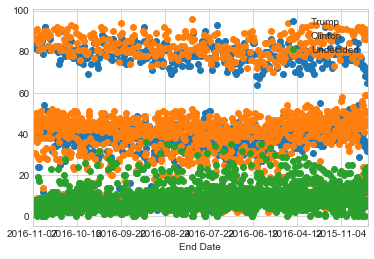

In [16]:
poll_df.plot(x = 'End Date', y = ['Trump', 'Clinton', 'Undecided'], linestyle = '', marker = 'o')

In [17]:
from datetime import datetime

In [18]:
poll_df['Difference'] = (poll_df.Trump - poll_df.Clinton) / 100

In [19]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,0.02


In [20]:
poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()

poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,-0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,-0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,-0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,-0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,-0.1425


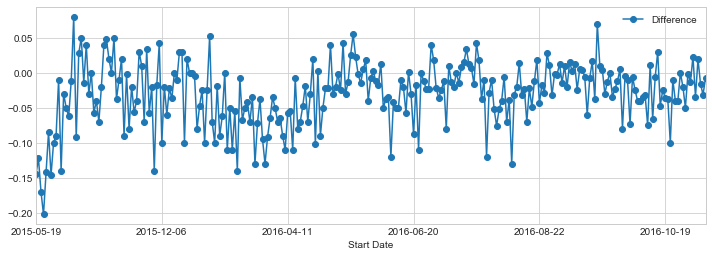

In [21]:
poll_df.plot('Start Date', 'Difference', figsize = (12, 4), marker = 'o', linestyle = '-')

In [22]:
#donor_df = pd.read_csv('donor_data_2016.txt', sep = '', header = None)

#donor_df = pd.read_csv('donor_data_2016.txt', sep = ",", error_bad_lines=False)

donor_df = pd.read_csv('donor_data_2016.txt', sep = "|", header = None)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,10,15,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
donor_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,C00004606,N,M4,P,15951124869,15,IND,"ARNOLD, ROBERT",MCPHERSON,KS,...,SELF,OPTOMETRIST,3102015.0,1000,NaN,SA11AI.20747,1002259,NaN,NaN,4041320151241796098
1,C00004606,N,M4,P,15951124869,15,IND,"BICKLE, DON",HAYS,KS,...,RETIRED,RETIRED,3302015.0,1000,NaN,SA11AI.20772,1002259,NaN,NaN,4041320151241796099
2,C00004606,N,M4,P,15951124869,15,IND,"ROSSMAN, RICHARD",OLATHE,KS,...,CRAWFORD SALES COMPANY,BUSINESSMAN,3302015.0,250,NaN,SA11AI.20759,1002259,NaN,NaN,4041320151241796100
3,C00452383,N,M4,P,15951124897,15,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,...,NaN,NaN,3112015.0,500,NaN,SA11AI.25088,1002261,NaN,NaN,4041320151241796102
4,C00452383,N,M4,P,15951124897,15,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,...,NaN,NaN,3022015.0,250,NaN,SA11AI.25074,1002261,NaN,NaN,4041320151241796103


In [24]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20354014 entries, 0 to 20354013
Data columns (total 21 columns):
0     object
1     object
2     object
3     object
4     int64
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    float64
14    int64
15    object
16    object
17    int64
18    object
19    object
20    int64
dtypes: float64(1), int64(4), object(16)
memory usage: -875492864.0+ bytes


In [25]:
header_df = pd.read_csv('header_file.csv')

#header_df.columns

donor_df.columns = header_df.columns

In [26]:
donor_df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00004606,N,M4,P,15951124869,15,IND,"ARNOLD, ROBERT",MCPHERSON,KS,...,SELF,OPTOMETRIST,3102015.0,1000,NaN,SA11AI.20747,1002259,NaN,NaN,4041320151241796098
1,C00004606,N,M4,P,15951124869,15,IND,"BICKLE, DON",HAYS,KS,...,RETIRED,RETIRED,3302015.0,1000,NaN,SA11AI.20772,1002259,NaN,NaN,4041320151241796099
2,C00004606,N,M4,P,15951124869,15,IND,"ROSSMAN, RICHARD",OLATHE,KS,...,CRAWFORD SALES COMPANY,BUSINESSMAN,3302015.0,250,NaN,SA11AI.20759,1002259,NaN,NaN,4041320151241796100
3,C00452383,N,M4,P,15951124897,15,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,...,NaN,NaN,3112015.0,500,NaN,SA11AI.25088,1002261,NaN,NaN,4041320151241796102
4,C00452383,N,M4,P,15951124897,15,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,...,NaN,NaN,3022015.0,250,NaN,SA11AI.25074,1002261,NaN,NaN,4041320151241796103


In [27]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20354014 entries, 0 to 20354013
Data columns (total 21 columns):
CMTE_ID            object
AMNDT_IND          object
RPT_TP             object
TRANSACTION_PGI    object
IMAGE_NUM          int64
TRANSACTION_TP     object
ENTITY_TP          object
NAME               object
CITY               object
STATE              object
ZIP_CODE           object
EMPLOYER           object
OCCUPATION         object
TRANSACTION_DT     float64
TRANSACTION_AMT    int64
OTHER_ID           object
TRAN_ID            object
FILE_NUM           int64
MEMO_CD            object
MEMO_TEXT          object
SUB_ID             int64
dtypes: float64(1), int64(4), object(16)
memory usage: -875492864.0+ bytes


In [28]:
donor_df['TRANSACTION_AMT'].value_counts()

25         2443880
50         2058233
100        1781649
10         1321023
5          1139374
15         1100159
250         938509
20          633721
500         589022
35          543371
27          484397
1000        397408
200         298574
3           267642
30          264868
40          246173
75          236408
19          225991
2700        221174
38          205751
1           202544
150         175688
8           150652
2           137890
300         134239
60          103131
41           90569
12           88291
0            82690
11           81127
            ...   
23633            1
7096             1
7187             1
2681             1
7103             1
2677             1
7125             1
7139             1
7137             1
1350000          1
7158             1
7163             1
39952            1
138310           1
7180             1
7186             1
7259             1
7189             1
2657             1
335033           1
39948            1
7203        

In [29]:
don_mean = donor_df['TRANSACTION_AMT'].mean()

don_std = donor_df['TRANSACTION_AMT'].std()

print(f'The average donation is: {don_mean} with standard deviation of: {don_std}')

The average donation is: 300.18772537937724 with standard deviation of: 18932.961387429837


In [30]:
top_donor = donor_df['TRANSACTION_AMT'].copy()

top_donor.sort_values(inplace=True)

top_donor

389276       -226800
19833580     -200000
15318738     -129000
15310901     -121000
9780173      -105000
321816       -100200
4252736      -100200
321762       -100200
4251976      -100200
14641895     -100000
14438565     -100000
983192        -66600
17037138      -66600
19833140      -59800
14735473      -55800
17302320      -54867
5261634       -53400
9777167       -50000
14707676      -50000
17067608      -50000
17027800      -50000
14542870      -50000
17302321      -46807
13951277      -40000
15294976      -40000
11476862      -40000
14474240      -35000
5231050       -33400
6092716       -33400
34041         -33400
              ...   
16112868     5500000
9232072      6000000
14343762     6000000
9780842      6000000
5081595      6000000
15691263     6175000
8403873      7000000
9629262      7000000
7284658      7000000
9232069      7000000
17250367     7500000
17250368     7500000
16582134     7800000
3986461      8000000
13826903     8500000
7238617      8966466
16468196     

In [31]:
top_donor = top_donor[top_donor > 0]

top_donor.sort_values(inplace=True)

top_donor.head()

7621453     1
18097562    1
10770247    1
10770246    1
10770245    1
Name: TRANSACTION_AMT, dtype: int64

In [32]:
top_donor.value_counts().head(10)

25     2443880
50     2058233
100    1781649
10     1321023
5      1139374
15     1100159
250     938509
20      633721
500     589022
35      543371
Name: TRANSACTION_AMT, dtype: int64

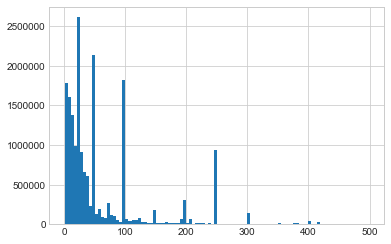

In [33]:
com_don = top_donor[top_donor < 500]

com_don.hist(bins = 100)

In [34]:
candi_comit = donor_df.CMTE_ID.unique()
print('Total number of candidates: {}'.format(len(candi_comit)))
candi_comit

Total number of candidates: 7413


array(['C00004606', 'C00452383', 'C00411116', ..., 'C00617209',
       'C00622795', 'C00629188'], dtype=object)

In [35]:
conditions = [
    (donor_df['CMTE_ID'] == 'C00580100'),
    (donor_df['CMTE_ID'] == 'C00575795')
]

choices = ['Trump', 'Clinton']

donor_df['Candidate'] = np.select(conditions, choices, default = 'Others')

In [36]:
donor_df['Candidate'].value_counts()
#donor_df.head()

Others     17698057
Clinton     2516367
Trump        139590
Name: Candidate, dtype: int64

In [37]:
donor_df = donor_df[donor_df.TRANSACTION_AMT > 0]

In [38]:
donor_df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,Candidate
0,C00004606,N,M4,P,15951124869,15,IND,"ARNOLD, ROBERT",MCPHERSON,KS,...,OPTOMETRIST,3102015.0,1000,NaN,SA11AI.20747,1002259,NaN,NaN,4041320151241796098,Others
1,C00004606,N,M4,P,15951124869,15,IND,"BICKLE, DON",HAYS,KS,...,RETIRED,3302015.0,1000,NaN,SA11AI.20772,1002259,NaN,NaN,4041320151241796099,Others
2,C00004606,N,M4,P,15951124869,15,IND,"ROSSMAN, RICHARD",OLATHE,KS,...,BUSINESSMAN,3302015.0,250,NaN,SA11AI.20759,1002259,NaN,NaN,4041320151241796100,Others
3,C00452383,N,M4,P,15951124897,15,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,...,NaN,3112015.0,500,NaN,SA11AI.25088,1002261,NaN,NaN,4041320151241796102,Others
4,C00452383,N,M4,P,15951124897,15,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,...,NaN,3022015.0,250,NaN,SA11AI.25074,1002261,NaN,NaN,4041320151241796103,Others


In [39]:
candi_amount = donor_df.groupby('Candidate')['TRANSACTION_AMT'].count()
candi_amount

Candidate
Clinton     2515042
Others     17336171
Trump        138646
Name: TRANSACTION_AMT, dtype: int64

In [40]:
candi_sum = donor_df.groupby('Candidate')['TRANSACTION_AMT'].sum()

i = 0
for candi in candi_sum:
    print ('%s raised %.0f dollars' %(candi_sum.index[i], candi))
    print ('\n')
    i += 1

Clinton raised 293998038 dollars


Others raised 5824577742 dollars


Trump raised 65995252 dollars




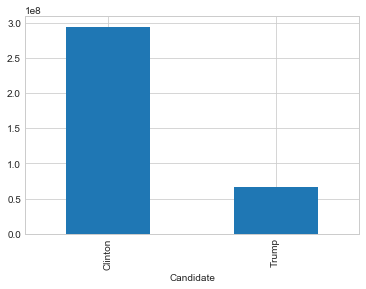

In [41]:
candi_sum.drop('Others').plot(kind = 'bar')

In [42]:
occupation_df = donor_df.pivot_table('TRANSACTION_AMT', index = 'OCCUPATION',
                                    columns = 'Candidate',
                                    aggfunc = 'sum')

In [43]:
occupation_df.head()

Candidate,Clinton,Others,Trump
OCCUPATION,,,
\tRETIRED,NaN,416.0,NaN
(RETIRED),NaN,54.0,NaN
ABI PRODUCT MANAGEMENT,NaN,118.0,NaN
ACCOUNTING RESEARCH POLICY 1,NaN,69.0,NaN
ADMINISTRATION AND REAL ESTATE,NaN,81.0,NaN


In [44]:
occupation_df.drop(['Others'], axis = 1, inplace = True)

In [45]:
occupation_df.head()

Candidate,Clinton,Trump
OCCUPATION,,
\tRETIRED,NaN,NaN
(RETIRED),NaN,NaN
ABI PRODUCT MANAGEMENT,NaN,NaN
ACCOUNTING RESEARCH POLICY 1,NaN,NaN
ADMINISTRATION AND REAL ESTATE,NaN,NaN


In [46]:
occupation_df.shape

(313416, 2)

In [47]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [48]:
occupation_df.shape

(38, 2)

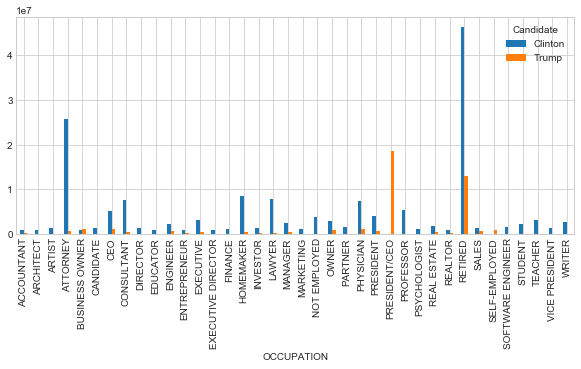

In [49]:
occupation_df.plot(kind = 'bar', figsize = (10,4))

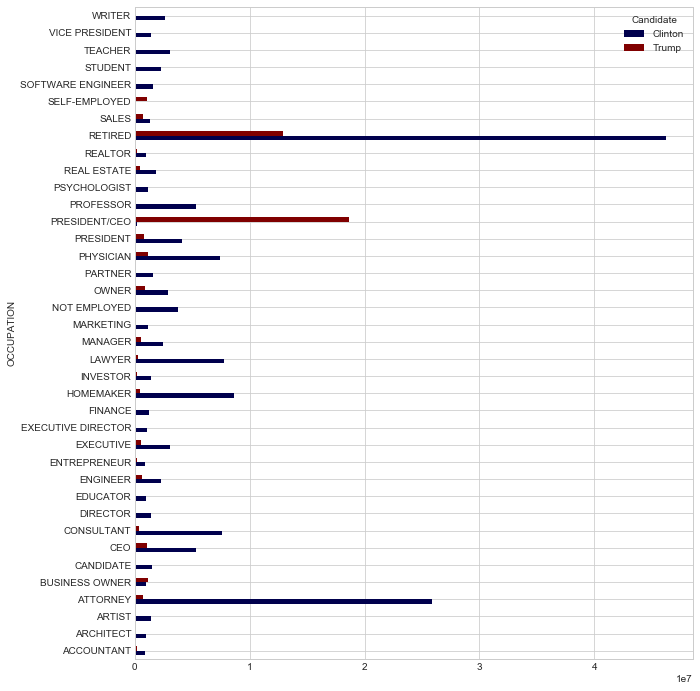

In [50]:
occupation_df.plot(kind = 'barh', figsize = (10,12), cmap = 'seismic')

In [58]:
#occupation_df.loc['EXECUTIVE DIRECTOR'] = occupation_df.loc['EXECUTIVE DIRECTOR'] + occupation_df.loc['EXECUTIVE'] + occupation_df.loc['DIR
#occupation_df.drop(['DIRECTOR', 'EXECUTIVE'], inplace = True)

In [69]:
occupation_df.loc['PRESIDENT/CEO'] = occupation_df.loc['VICE PRESIDENT'] + occupation_df.loc['PRESIDENT/CEO'] 

In [70]:
occupation_df.loc['PRESIDENT/CEO'] = occupation_df.loc['PRESIDENT/CEO'] + occupation_df.loc['PRESIDENT']

In [71]:
occupation_df.loc['PRESIDENT/CEO'] = occupation_df.loc['PRESIDENT/CEO'] + occupation_df.loc['CEO']

In [72]:
                                                                                                                        
occupation_df.drop(['VICE PRESIDENT', 'PRESIDENT', 'CEO'], inplace = True)

In [73]:
occupation_df.loc['EXECUTIVE DIRECTOR'] = occupation_df.loc['EXECUTIVE DIRECTOR'] + occupation_df.loc['EXECUTIVE']

In [74]:
occupation_df.loc['EXECUTIVE DIRECTOR'] = occupation_df.loc['EXECUTIVE DIRECTOR'] + occupation_df.loc['DIRECTOR'] 

In [75]:
occupation_df.drop(['DIRECTOR', 'EXECUTIVE'], inplace = True)

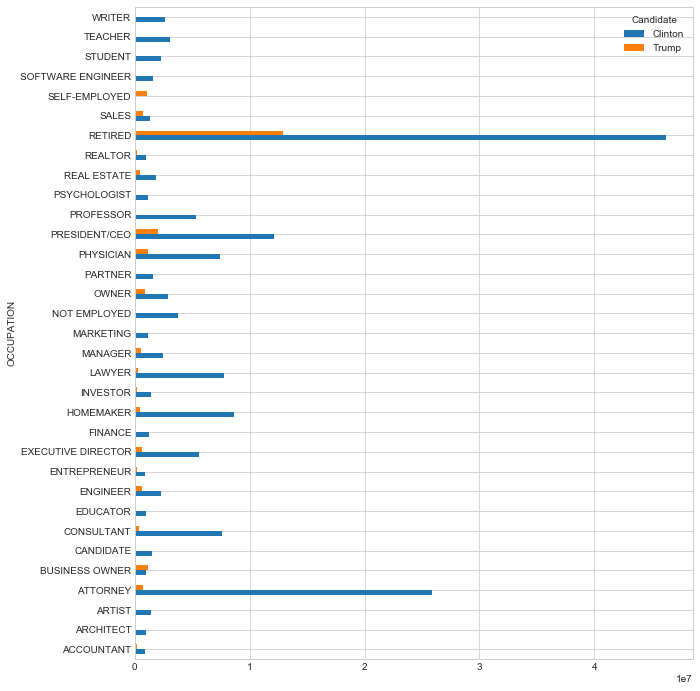

In [76]:
occupation_df.plot(kind = 'barh', figsize = (10,12))